In [20]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [21]:
% matplotlib inline

# Architecture of Deep Neural Network, Cost Function and Regularization
<img src='./images/dnncost.png'>

# Solve using Keras with Tensorflow backend

We will now create a neural network to be for recoqnizing hand-written digits using the Keras library. First we will download and inspect the dataset.

In [2]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape)
print(X_test.shape)

Using TensorFlow backend.


(60000, 28, 28)
(10000, 28, 28)


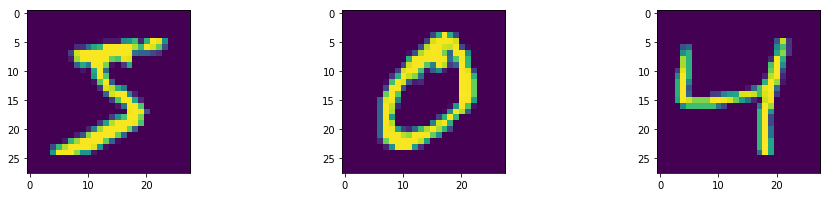

In [3]:
import matplotlib.pyplot as plt

f,ax = plt.subplots(1,3, figsize=(16,3))
ax[0].imshow(X_train[0])
ax[1].imshow(X_train[1])
ax[2].imshow(X_train[2])
plt.show()

In [4]:
# by inspecting the training labels, we see what these images are ment to show
print(y_train[0:3])

[5 0 4]


We will now convert the input data to the right representation


In [5]:
from sklearn.preprocessing import LabelBinarizer
import numpy as np
# all inputs are defined as vectors, i.e. we collapse a 28x28 image to a 784 feature vector
# all inputs should be scaled to the range [0,1] (images are in the range [0,255])
X  = X_train.reshape(60000,784) / 255
Xt = X_test.reshape( 10000,784) / 255

# all outputs are defined as categorical values. We do a one-hot encoding of these
categorical_transform = LabelBinarizer().fit(np.arange(10)) # labels are in the range [0,10]
y  = categorical_transform.transform(y_train)
yt = categorical_transform.transform(y_test)

print(y[:10,:])
print(y_train[:10])

[[0 0 0 0 0 1 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1]
 [0 0 1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]]
[5 0 4 1 9 2 1 3 1 4]


We define a convenience method to display multiple images and show these as scaled grayscale images

In [6]:
import math

def displayData(X, example_width=None):
    m,n = X.shape
    plt.figure(figsize=(16,16))
    if X.ndim == 1:
        X = np.reshape(X, (-1,m))
    if not example_width or not 'example_width' in locals():
        example_width = int(round(math.sqrt(X.shape[1])))
    example_height = n / example_width
    display_rows = int(math.floor(math.sqrt(m)))
    display_cols = int(math.ceil(m / display_rows))
    pad = 1
    display_array = -np.ones((pad + display_rows * int(example_height + pad),  pad + display_cols * int(example_width + pad)))
    curr_ex = 1
    for j in range(1,display_rows+1):
        for i in range (1,display_cols+1):
            if curr_ex > m:
                break
            max_val = max(abs(X[curr_ex-1, :]))
            rows = pad + (j - 1) * (int(example_height) + pad) + np.array(range(int(example_height)))
            cols = pad + (i - 1) * (int(example_width)  + pad) + np.array(range(int(example_width)))
            display_array[rows[0]:rows[-1]+1 , cols[0]:cols[-1]+1] = np.reshape(X[curr_ex-1, :], (int(example_height), int(example_width)), order="F") / max_val
            curr_ex += 1
            if curr_ex > m:
                break
    h = plt.imshow(display_array.T, vmin=-1, vmax=1, cmap='gray')
    plt.axis('off')
    plt.show(block=False)
    return h, display_array

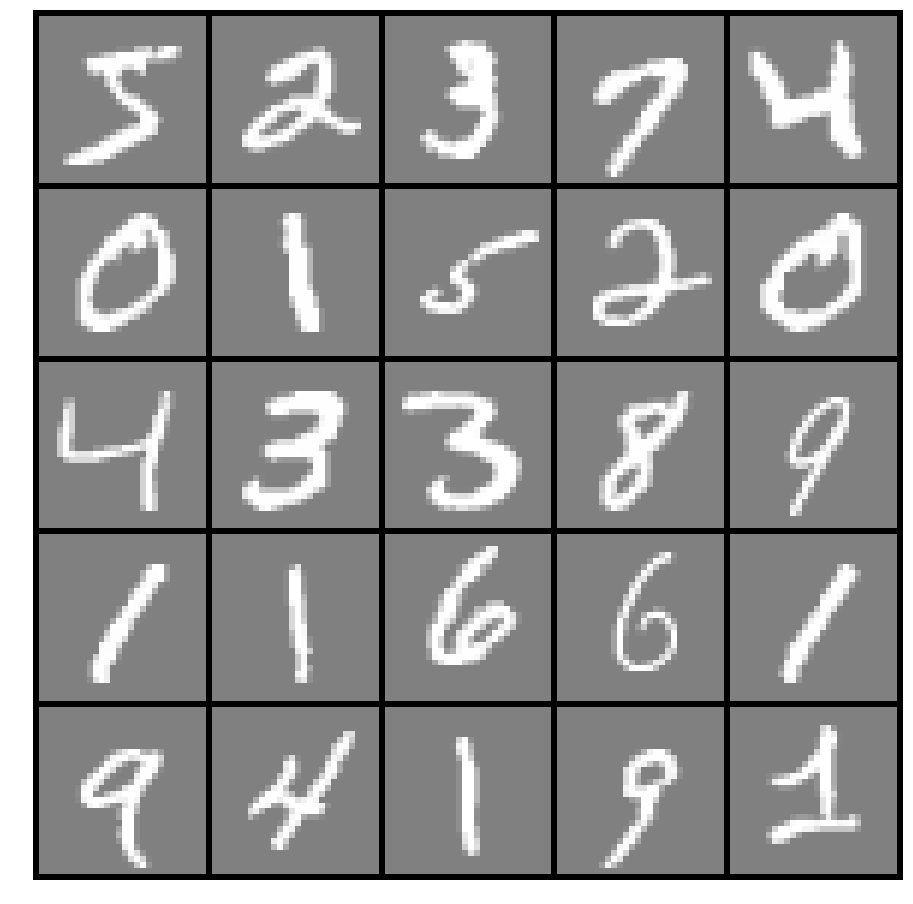

In [7]:
displayData(X[:25,:]);

We will now create a Neural Network model in Keras using the Sequential model

In [8]:
from keras.models import Sequential
from keras.layers import Dense

# create a model of sequential layers 
model = Sequential()

# add the first layer, this *requires* you to specify the input dimension (our 28*28=784 px images)
model.add(Dense(input_dim=784, units = 100, activation='sigmoid'))

# add the second layer. All layers require you to specify the number of neurons (units)
model.add(Dense(               units =  49, activation='sigmoid'))

# the third and final output layer. We here use the 'softmax' activation function since we want to classify
# the numbers [0-9] with a percentage prediction
model.add(Dense(               units =  10, activation='softmax'))

# finish the model and compile it so it is ready for training
model.compile(optimizer= 'adam',                     
              loss     = 'categorical_crossentropy',
              metrics  = ['accuracy'])

In [9]:
model.fit(X, y,
         epochs=10,
         batch_size=100,
         validation_data=(Xt,yt))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 59us/step - loss: 0.8143 - acc: 0.8153 - val_loss: 0.3292 - val_acc: 0.9154
Epoch 2/10
60000/60000 [==============================] - 2s 31us/step - loss: 0.2730 - acc: 0.9250 - val_loss: 0.2221 - val_acc: 0.9352
Epoch 3/10
60000/60000 [==============================] - 2s 29us/step - loss: 0.1988 - acc: 0.9432 - val_loss: 0.1769 - val_acc: 0.9476
Epoch 4/10
60000/60000 [==============================] - 2s 31us/step - loss: 0.1577 - acc: 0.9549 - val_loss: 0.1447 - val_acc: 0.9564
Epoch 5/10
60000/60000 [==============================] - 2s 31us/step - loss: 0.1296 - acc: 0.9629 - val_loss: 0.1283 - val_acc: 0.9614
Epoch 6/10
60000/60000 [==============================] - 2s 32us/step - loss: 0.1087 - acc: 0.9685 - val_loss: 0.1147 - val_acc: 0.9635
Epoch 7/10
60000/60000 [==============================] - 2s 32us/step - loss: 0.0929 - acc: 0.9737 - val_loss: 0.1046 - val_acc

Using a relatively small network, we still achieve an accuracy of over 98% on the training set and 97% on the test test. 

We now use our model on one of the test images to manually make a prediction. Remember that the test images are *not* used for updating the weights, so this is considered an unseen example image by the model

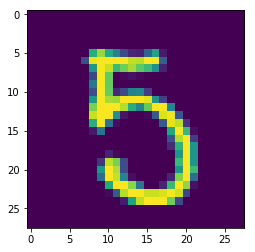

This is actually a 5

[[  1.82531057e-05   4.73345077e-04   1.96297947e-06   7.56148472e-02
    1.51862871e-04   9.17686105e-01   5.71417113e-05   2.39962083e-03
    2.24071584e-04   3.37286782e-03]]

91.76861047744751 % chance of this being a 5


In [10]:
i = 207 # choose one test image index

# show one of the test images
plt.imshow(X_test[i,:,:])
plt.show()
print('This is actually a', y_test[i]) # this is what it is *supposed* to be
print()

# do a prediction using our model
prediction = model.predict(X_test[i,:,:].reshape(1,28*28)) # remember to roll the image data into a vector


# the prediction is a vector of 10 (output nodes) with % probability of that being the shown digit (softmax function)
print(prediction)
print()
print('{} % chance of this being a {}'.format(prediction[0,y_test[i]]*100, y_test[i]))

# Visualizing the weights

In [26]:
import numpy as np
theta1 = model.layers[0].get_weights()[0] # returns a tuple of weights and the bias, we only care about weights now
theta2 = model.layers[1].get_weights()[0]
theta3 = model.layers[2].get_weights()[0]

print(theta1.shape)
print(theta2.shape)
print(theta3.shape)
# keras stores the weights as the transpose of the above, so we correct these
theta1 = theta1.T
theta2 = theta2.T
theta3 = theta3.T
theta = theta3 @ theta2 @ theta1
print(theta.shape)

(784, 100)
(100, 49)
(49, 10)
(10, 784)


Seing as the inputs are considered image pixels, we may now draw reinpret the effect of $\Theta$ as image pixels. We reshape from 784 to (28,28) and draw the 10 images resulting from this

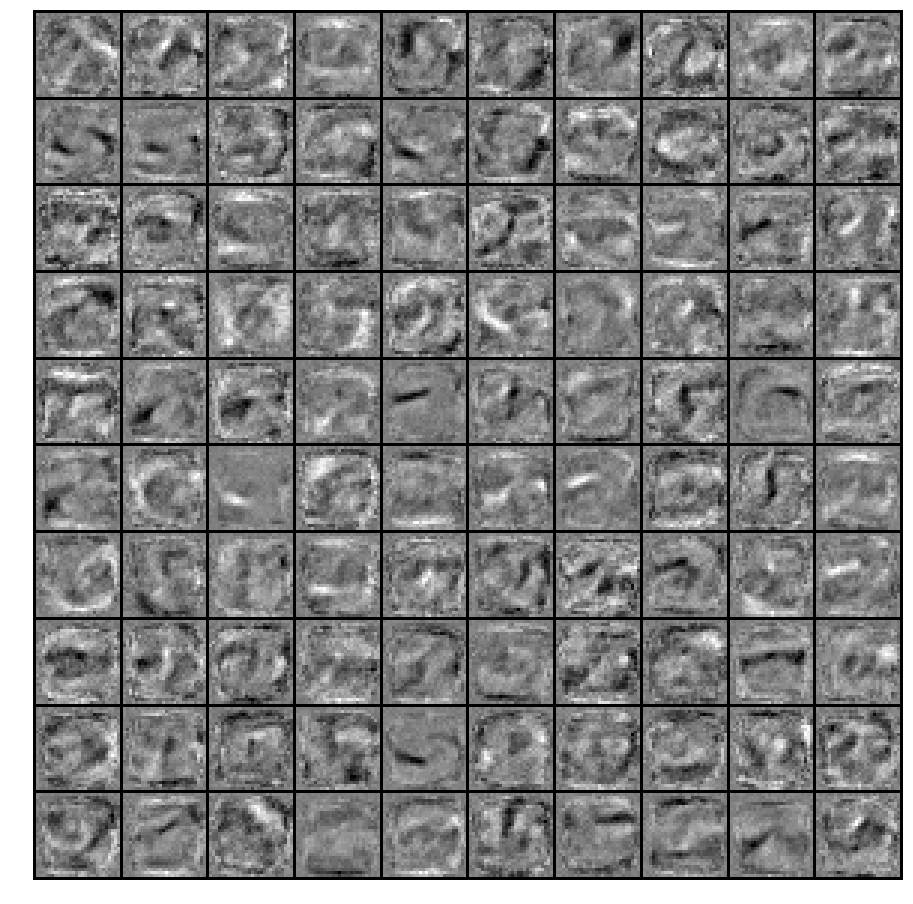

In [27]:
displayData(theta1);

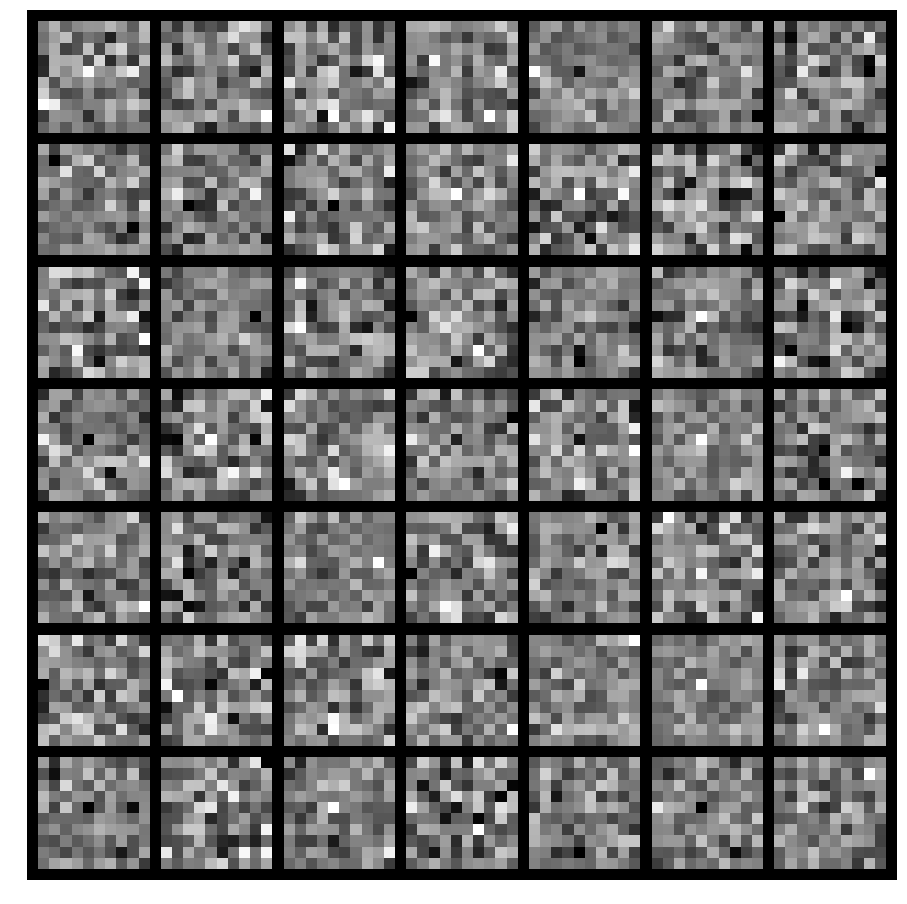

In [28]:
displayData(theta2);

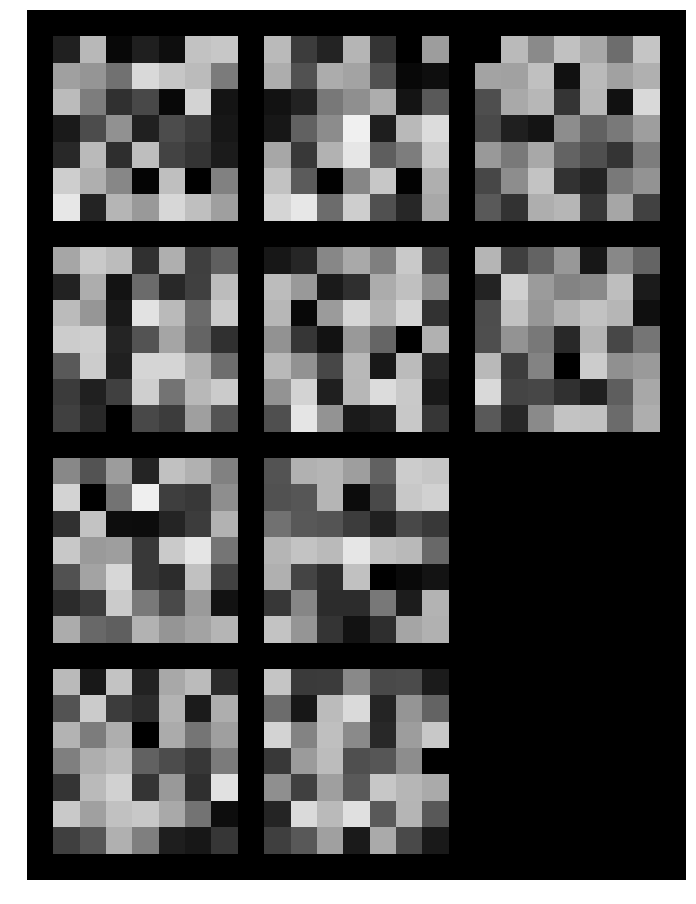

In [29]:
displayData(theta3);